## DATA 71200: Project 1
## Spring2020 - Lu Tong


In [1]:
import pandas as pd
import numpy as np
import string
import re
from wordcloud import STOPWORDS

### Step 1: Find and download a dataset

Data Source: Kaggle Competition - Real or Not? NLP with Disaster Tweets

Link: https://www.kaggle.com/c/nlp-getting-started

In [2]:
df_train = pd.read_csv('train.csv', dtype={'id': np.int16, 'target': np.int8})
df_test = pd.read_csv('test.csv', dtype={'id': np.int16})

print('Training Set Shape = {}'.format(df_train.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df_train.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(df_test.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(df_test.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.20 MB
Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.08 MB


### Step 2: Divide into a training set and a testing set
Since the Kaggle Competition already splited the datasets into training set and testing set, I include codes below to show how to divide datasets.

In [3]:
from sklearn.model_selection import train_test_split
X = df_train["text"].tolist()
y = df_train["target"].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=40)

### Step 3: Explore your training set
I conduct my exploration on the real training set.

In [4]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int16
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int8
dtypes: int16(1), int8(1), object(3)
memory usage: 200.8+ KB


In [6]:
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


#### Since my X is text data, it is neccesary to generate more numerical features for us to explore the relationship

In [7]:
# word_count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_test['stop_word_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

# punctuation_count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

### Step 4: Data cleaning
#### Text Cleaning
For twitter raw data, it's very important to clean the data and transform them in certain way to help program identify its features

In [8]:
df_train_clean = df_train.copy()
df_test_clean = df_test.copy()
df_train_clean.head()

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,punctuation_count,hashtag_count,mention_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,0,4.384615,69,1,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7,0,0,4.571429,38,1,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,20,11,0,5.090909,133,3,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,8,1,0,7.125000,65,2,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,0,4.500000,88,2,2,0


In [9]:
#Removing urls
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

df_train_clean['text']=df_train_clean['text'].apply(lambda x : remove_url(x))
df_test_clean['text']=df_test_clean['text'].apply(lambda x : remove_url(x))

In [10]:
#Removing HTML
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

df_train_clean['text']=df_train_clean['text'].apply(lambda x : remove_html(x))
df_test_clean['text']=df_test_clean['text'].apply(lambda x : remove_html(x))

In [11]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df_train_clean['text']=df_train_clean['text'].apply(lambda x : remove_emoji(x))
df_test_clean['text']=df_test_clean['text'].apply(lambda x : remove_emoji(x))

In [12]:
#Removing punctuations
import string
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

df_train_clean['text']=df_train_clean['text'].apply(lambda x : remove_punct(x))
df_test_clean['text']=df_test_clean['text'].apply(lambda x : remove_punct(x))

#Spelling correction
#!pip install pyspellchecker

from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
df_train_clean['text']=df_train_clean['text'].apply(lambda x : correct_spellings(x))

### Step 5: Visualize the data in your training set

In [13]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from pandas.plotting import scatter_matrix

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWar

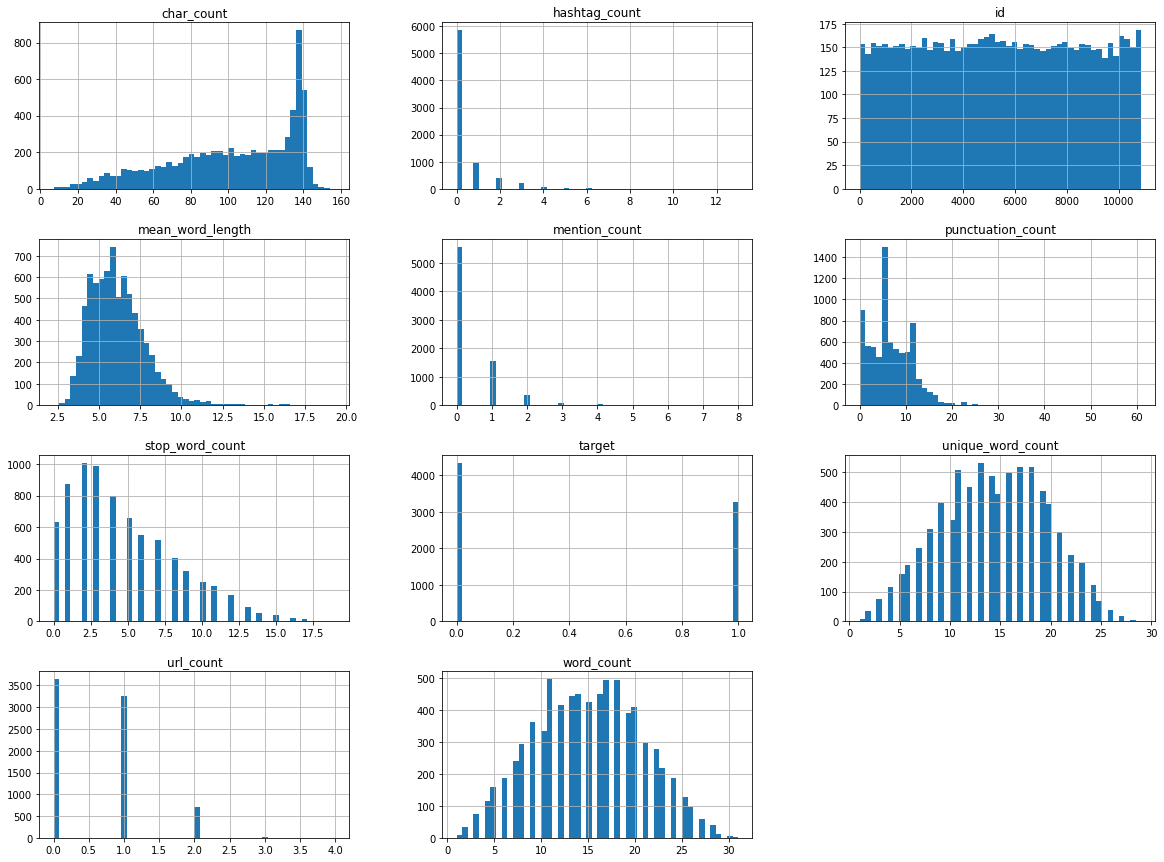

In [14]:
df_train_clean.hist(bins=50,figsize=(20,15))
plt.show()

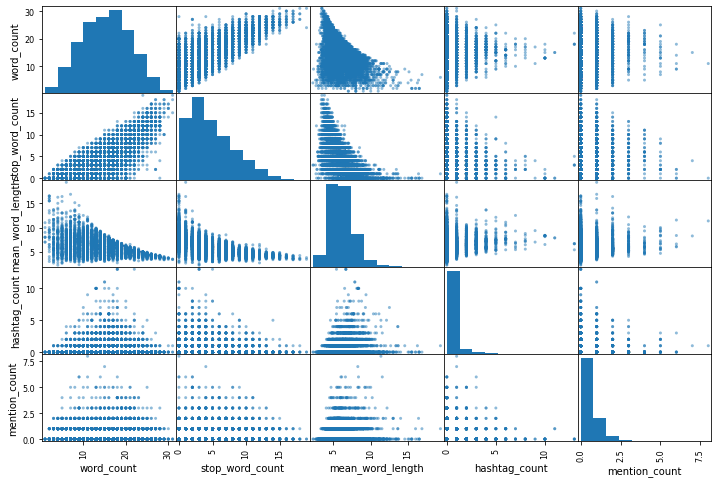

In [15]:
attributes = ['word_count','stop_word_count','mean_word_length','hashtag_count','mention_count']
scatter_matrix(df_train_clean[attributes],figsize=(12,8))
plt.show()

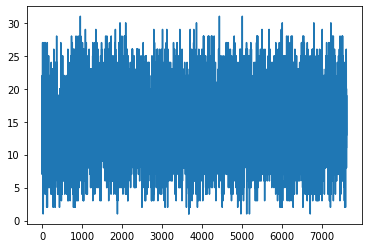

In [16]:
#word_count distribution
plt.plot(df_train_clean['word_count'].values.reshape(-1, 1))
plt.show()

bin edges: 
 [array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.])]


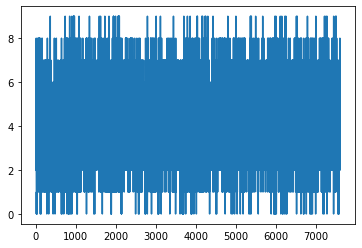

In [17]:
#binned word count distribution
wcount = df_train_clean['word_count'].values.reshape(-1, 1)
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(wcount)
print("bin edges: \n", kb.bin_edges_)
wcount = kb.transform(wcount)
plt.plot(wcount.argmax(1))
plt.show()

bin edges: 
 [array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ])]


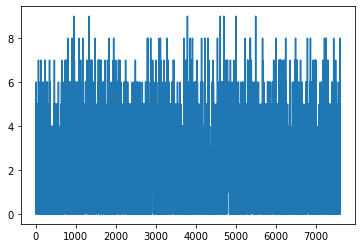

In [18]:
#binned unique word count distribution
scount = df_train_clean['stop_word_count'].values.reshape(-1, 1)
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(scount)
print("bin edges: \n", kb.bin_edges_)
wcount = kb.transform(scount)
plt.plot(wcount.argmax(1))
plt.show()

bin edges: 
 [array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ])]


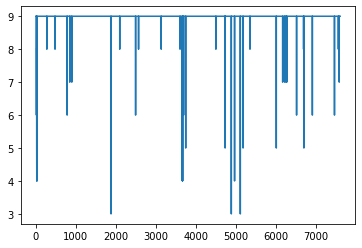

In [19]:
#binned unique word count distribution
charcount = df_train_clean['char_count'].values.reshape(-1, 1)
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(scount)
print("bin edges: \n", kb.bin_edges_)
wcount = kb.transform(charcount)
plt.plot(wcount.argmax(1))
plt.show()

### Step 6: Apply transformations to your data

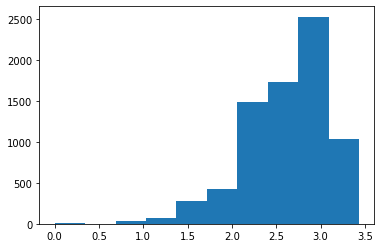

In [20]:
wordcount = df_train_clean['word_count'].values.reshape(-1, 1)
plt.hist(np.log(wordcount),bins=10)
plt.show()

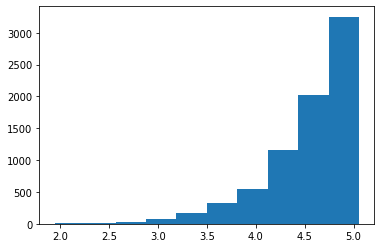

In [21]:
charcount = df_train_clean['char_count'].values.reshape(-1, 1)
plt.hist(np.log(charcount),bins=10)
plt.show()

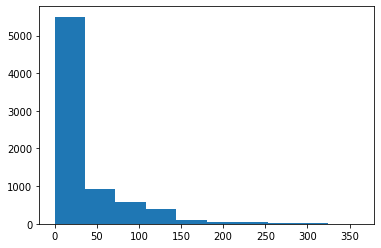

In [22]:
stopcount = df_train_clean['stop_word_count'].values.reshape(-1, 1)
plt.hist(stopcount**2,bins=10)
plt.show()

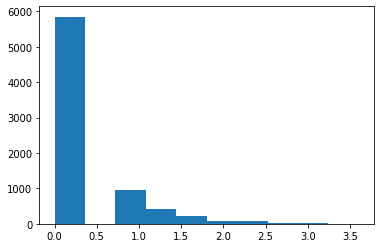

In [23]:
hashcount = df_train_clean['hashtag_count'].values.reshape(-1, 1)
plt.hist(np.sqrt(hashcount),bins=10)
plt.show()

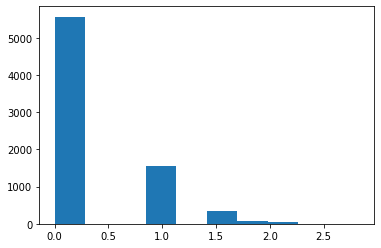

In [24]:
mentioncount = df_train_clean['mention_count'].values.reshape(-1, 1)
plt.hist(np.sqrt(mentioncount),bins=10)
plt.show()